In [ ]:
class EDA(database, columns = None, identifers = None):
    def describe 
    
    
    

In [42]:
import numpy as np
import pandas as pd
import reportlab
from sklearn import datasets
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_CENTER
from reportlab.platypus.tables import Table, TableStyle
from io import BytesIO

In [25]:
class report_pdf:
    
    def __init__(self, name = 'report.pdf', title = 'Report', pages = None):
    
        self.name = name
        # Create a PDF report
        if pages == None:
            self.doc = SimpleDocTemplate(name, pagesize=letter)

        else:
            self.doc = SimpleDocTemplate(name, pagesize=pages)
        self.story = []

        # Add a title to the report
        styles = getSampleStyleSheet()
        title = Paragraph(title, styles['Title'])
        self.story.append(title)
        self.story.append(Spacer(1, 12))

    def add_image(self):
        # Save the Matplotlib plot as an image
        plot_image = BytesIO()
        plt.savefig(plot_image, format='png')


        # Add the data visualization (Matplotlib plot) to the report
        plot_image.seek(0)
        plot_img = Image(plot_image)
        plot_img.drawHeight = 300
        plot_img.drawWidth = 500
        #add image to report
        self.story.append(plot_img)
        self.story.append(Spacer(1, 12))
        
    def add_table(self,data):
        
        #convert Dataframe to arrays
        table = Table([data.columns.tolist()] + data.values.tolist())
        
        #set style
        table.setStyle(TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
            ('GRID', (0, 0), (-1, -1), 1, colors.black)
        ]))
        
         #add table to report
        self.story.append(table)
    
    def build_report(self):
        # Build the PDF report
        self.doc.build(self.story)
        self.story.append(Spacer(1, 12))

        print(f"PDF report saved as {self.name}")

In [26]:
class data_vis:
    def __init__(self, base, save = False, report_doc = None):
        
        self.base = base.copy()
        self.save = save
        self.report_doc = report_doc
            
    def vis_base(self, base = None, title = 'base de dados', save = False):
        
        self.save = save
        if base == None:
            base = self.base
        if self.save:
            base.to_excel(title+'.xlsx')
        
        if self.report_doc:
            self.report_doc.add_table(base)
    
    
    def graph_bar(self, category ,numeric, title = 'Bar Chart', save = False ):
        
        self.save = save
        
        plt.figure(figsize=(8, 4))
        plt.bar(self.base[category], self.base[numeric])
        plt.xlabel(category)
        plt.ylabel(numeric)
        plt.title(title)
        
        if self.save:
            plt.savefig(title, format='png')
        
        if self.report_doc:
            self.report_doc.add_image()
            
        plt.close()
        
#    # Example visualizations
#plt.figure(figsize=(10, 6))
#sns.histplot(df['NumericColumn'], kde=True)
#plt.title('Histogram of Numeric Column')
#
#plt.figure(figsize=(10, 6))
#sns.boxplot(x='CategoricalColumn', y='NumericColumn', data=df)
#plt.title('Box Plot of Numeric Column by Category')
#
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='Feature1', y='Feature2', data=df)
#plt.title('Scatter Plot of Two Features')
#
#plt.figure(figsize=(10, 6))
#correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#
#cross_tab = pd.crosstab(df['CategoricalColumn1'], df['CategoricalColumn2'])
#plt.figure(figsize=(10, 6))
#sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
#plt.title('Crosstab Heatmap')
#
## Data Visualization
## Example visualizations for categorical columns
#plt.figure(figsize=(10, 6))
#sns.countplot(x='CategoricalColumn', data=df)
#plt.title('Count of Each Category in Categorical Column')
#
#plt.figure(figsize=(12, 6))
#sns.boxplot(x='CategoricalColumn', y='NumericColumn', data=df)
#plt.title('Box Plot of Numeric Column by Category')
#
#plt.figure(figsize=(10, 6))
#sns.barplot(x='CategoricalColumn', y='NumericColumn', data=df, ci=None)
#plt.title('Bar Plot of Numeric Column by Category')
#

In [27]:
df_ = datasets.load_iris()
data = pd.DataFrame(df_['data'], columns = df_.feature_names)
data['classe'] = df_.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
report = report_pdf()
data_vis = data_vis(data, save = True, report_doc = report)

In [29]:
data_vis.vis_base(save = True)
data_vis.graph_bar('classe','sepal length (cm)', save = True)
report.build_report()

PDF report saved as report.pdf


In [30]:
df_des = data.describe()
df_des 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
df_des.loc['z_score+'] = df_des.loc['mean'] + df_des.loc['std']

In [32]:
df_des.loc['z_score-'] = df_des.loc['mean'] - df_des.loc['std']

In [33]:
df_des.loc['amplitude'] = df_des.loc['max'] - df_des.loc['min']

In [34]:
df_des.loc['IQR'] = df_des.loc['75%'] - df_des.loc['25%']

In [35]:
df_des.loc['IQR'] * 1.5

sepal length (cm)    1.95
sepal width (cm)     0.75
petal length (cm)    5.25
petal width (cm)     2.25
classe               3.00
Name: IQR, dtype: float64

In [36]:
df_des.loc['Limit_superior'] = df_des.loc['75%'] + (df_des.loc['IQR'] * 1.5) 
df_des.loc['Limit_inferior'] = df_des.loc['25%'] - (df_des.loc['IQR'] * 1.5) 

In [37]:
df_des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
z_score+,6.671399,3.493200,5.523298,1.961571,1.819232
z_score-,5.015267,2.621467,1.992702,0.437096,0.180768


In [44]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Alice'],
    'Age': [25, 30, 22, 28, 20],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Chicago']
}
df = pd.DataFrame(data)

In [45]:
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,22,Los Angeles
3,David,28,Chicago
4,Alice,20,Chicago


In [54]:
aux = pd.DataFrame()
df_final = pd.DataFrame()
aux = df['Name'].value_counts().reset_index()
aux['coluna'] = 'Name'
aux.columns = ['categoria','quantidade', 'coluna']
df_final = pd.concat([df_final,aux])

In [56]:
df_final = pd.concat([df_final,aux])
df_final[['coluna','categoria','quantidade']]

,coluna,categoria,quantidade
0,Name,Alice,2
1,Name,Charlie,1
2,Name,David,1
3,Name,Bob,1
0,Name,Alice,2
1,Name,Charlie,1
2,Name,David,1
3,Name,Bob,1
0,Name,Alice,2
1,Name,Charlie,1


In [59]:
df_final = pd.DataFrame()
for col in df[['Name', 'City']].columns:
    aux = df[col].value_counts().reset_index()
    aux['coluna'] = col
    aux.columns = ['categoria','quantidade', 'coluna']
    aux['%'] = aux['quantidade']/len(df)
    df_final = pd.concat([df_final,aux])
df_final[['coluna','categoria','quantidade','%']]

,coluna,categoria,quantidade,%
0,Name,Alice,2,0.4
1,Name,Charlie,1,0.2
2,Name,David,1,0.2
3,Name,Bob,1,0.2
0,City,Chicago,2,0.4
1,City,Los Angeles,1,0.2
2,City,San Francisco,1,0.2
3,City,New York,1,0.2


Text(0.5, 1.0, 'Count of Each Category in Categorical Column')

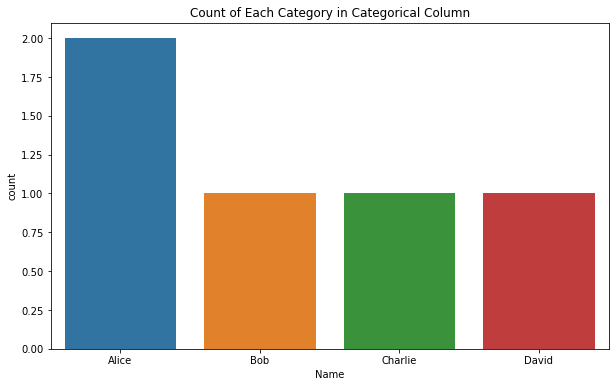

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Name', data=df)
plt.title('Count of Each Category in Categorical Column')